# MNIST Sequential Neural Network

Use como guía el código siguiente y desarrolle

1.1 Una red densa para clasificacion binaria entre los dígitos 4 y 9 con al menos igual desempeño que la red densa del código de ejemplo.

1.2 Una red convolucional para clasificar los dígitos 4 y 9 con al menos igual desempeño que la red densa del punto 1.1.

1.3 Compare la degradación del desempeño entre los diseños de los punto 1.1 y el 1.2 cuando se agrega ruido Gaussiano a las imágenes. Esto es, fijando la arquitectura, reenetrenelas para al menos 5 niveles de ruido distintos y gráfique su presicion. Use la desviación estandar como razón del rango dinámicos de las imágenes, $\sigma = 0.0,  0.2, 0.4, 0.6,$ y $0.8$.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)
numIm, szIm  = train_images.shape

nn = models.Sequential()    
nn.add(layers.Dense(units=10,activation='relu', input_shape=(szIm,)))         
nn.add(layers.Dense(units=10, activation='softmax'))

nn.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics  =['accuracy'])

nn.fit(x = train_images, y = train_labels, validation_split=0.2,
                 epochs = 10, shuffle = True, batch_size = 128)

results = nn.evaluate(test_images, test_labels)

print('loss: ', results[0])
print('accuray: {}%'.format(results[1]*100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 88us/step - loss: 0.8357 - acc: 0.7823 - val_loss: 0.4137 - val_acc: 0.8921
Epoch 2/10
48000/48000 [==============================] - 3s 71us/step - loss: 0.3773 - acc: 0.8957 - val_loss: 0.3236 - val_acc: 0.9095
Epoch 3/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.3219 - acc: 0.9092 - val_loss: 0.2920 - val_acc: 0.9181
Epoch 4/10
48000/48000 [==============================] - 4s 78us/step - loss: 0.2978 - acc: 0.9161 - val_loss: 0.2765 - val_acc: 0.9206
Epoch 5/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.2823 - acc: 0.9199 - val_loss: 0.2658 - val_acc: 0.9252
Epoch 6/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.2722 - acc: 0.9230 - val_loss: 0.2576 - val_acc: 0.9283
Epoch 7/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.2637 - acc: 0.9258 - val_loss: 0.2625 - val_acc

## Respuestas

### Respuesta a 1.1

In [54]:
def sample_data(X, y, samples, d1=4, d2=9):
    y1 = y[:,d1]
    y1 = y1.astype(bool)
    y2 = y[:,d2]
    y2 = y2.astype(bool)
    
    X1 = X[y1]
    X2 = X[y2]
    X1 = X1[:samples]
    X2 = X2[:samples]
    X_sample = np.r_[X1, X2]
    
    y1 = np.zeros(samples)
    y2 = np.ones(samples)
    
    y_sample = np.r_[y1, y2]
    y_sample = to_categorical(y_sample)
    return X_sample, y_sample

In [81]:
print(train_images.shape)
X_train, y_train = sample_data(train_images, train_labels, 2000, d1=4, d2=9) #Muestreamos los digitos 4 y 9
X_test, y_test = sample_data(test_images, test_labels, 900, d1=4, d2=9) #Muestreamos los digitos 4 y 9
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(4000, 784)
(4000, 2)
(1800, 784)
(1800, 2)


In [106]:
def dense_net(X_train, y_train, X_test, y_test, verbose=1):
    network = models.Sequential()    
    network.add(layers.Dense(units=32, activation='relu', input_shape=(szIm,)))
    network.add(layers.Dropout(0.5))
    network.add(layers.Dense(units=64,activation='relu'))
    network.add(layers.Dense(units=2, activation='softmax'))

    network.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics  =['accuracy'])

    network.fit(x = X_train, y = y_train, validation_split=0.2, epochs = 10, shuffle = True, batch_size = 128,verbose=verbose)

    results = network.evaluate(X_test, y_test)

    print('loss: ', results[0])
    print('accuray: {}%'.format(results[1]*100))
    return results[1]*100

In [108]:
dense_net(X_train, y_train, X_test, y_test)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 2s 543us/step - loss: 0.4607 - acc: 0.7891 - val_loss: 0.5084 - val_acc: 0.8100
Epoch 2/10
3200/3200 [==============================] - 0s 73us/step - loss: 0.2306 - acc: 0.9184 - val_loss: 0.3305 - val_acc: 0.9000
Epoch 3/10
3200/3200 [==============================] - 0s 82us/step - loss: 0.1590 - acc: 0.9462 - val_loss: 0.1941 - val_acc: 0.9400
Epoch 4/10
3200/3200 [==============================] - 0s 92us/step - loss: 0.1231 - acc: 0.9625 - val_loss: 0.1438 - val_acc: 0.9600
Epoch 5/10
3200/3200 [==============================] - 0s 92us/step - loss: 0.1138 - acc: 0.9594 - val_loss: 0.1616 - val_acc: 0.9550
Epoch 6/10
3200/3200 [==============================] - 0s 86us/step - loss: 0.0947 - acc: 0.9691 - val_loss: 0.1918 - val_acc: 0.9450
Epoch 7/10
3200/3200 [==============================] - 0s 84us/step - loss: 0.0876 - acc: 0.9731 - val_loss: 0.2915 - val_acc: 0.9187
Epoch 8

96.22222222222221

### Respuesta a 1.2

In [107]:
#Trasnformación de Matriz tensor de imagenes
X1_train = X_train.reshape(2000*2, 28, 28, 1)
X2_test = X_test.reshape(900*2, 28, 28, 1)

In [137]:
def cov_net(X_train, y_train, X_test, y_test, verbose=1):
    network1 = models.Sequential()
    network1.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(28, 28,1)))
    network1.add(layers.MaxPooling2D((2, 2)))
    network1.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    network1.add(layers.MaxPooling2D((2, 2)))
    network1.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    network1.add(layers.Flatten())
    network1.add(layers.Dense(2, activation='softmax'))


    network1.compile(optimizer='rmsprop',loss ='categorical_crossentropy',metrics  =['accuracy'])

    network1.fit(x = X_train, y = y_train, validation_split=0.2, epochs = 10, shuffle = True, batch_size = 128, verbose=verbose)

    results = network1.evaluate(X_test, y_test)

    print('loss: ', results[0])
    print('accuray: {}%'.format(results[1]*100))
    return results[1]*100

In [110]:
cov_net(X1_train, y_train, X2_test, y_test)

Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 4s 1ms/step - loss: 0.3188 - acc: 0.8578 - val_loss: 0.0209 - val_acc: 1.0000
Epoch 2/10
3200/3200 [==============================] - 2s 687us/step - loss: 0.0592 - acc: 0.9834 - val_loss: 0.0175 - val_acc: 0.9950
Epoch 3/10
3200/3200 [==============================] - 2s 712us/step - loss: 0.0322 - acc: 0.9888 - val_loss: 0.0526 - val_acc: 0.9800
Epoch 4/10
3200/3200 [==============================] - 2s 713us/step - loss: 0.0238 - acc: 0.9922 - val_loss: 0.0235 - val_acc: 0.9900
Epoch 5/10
3200/3200 [==============================] - 2s 714us/step - loss: 0.0218 - acc: 0.9925 - val_loss: 0.0468 - val_acc: 0.9825
Epoch 6/10
3200/3200 [==============================] - 2s 718us/step - loss: 0.0154 - acc: 0.9956 - val_loss: 0.0228 - val_acc: 0.9938
Epoch 7/10
3200/3200 [==============================] - 2s 716us/step - loss: 0.0106 - acc: 0.9975 - val_loss: 0.0073 - val_acc: 0.9975
Epo

99.55555555555556

### Respuesta a 1.3

In [111]:
import matplotlib.pyplot as plt

In [135]:
def comparison(sigma=[0.0,0.2,0.4,0.6,0.8], verbose=0):
    den, cov = [],[]
    for s in sigma:
        den.append(dense_net(X_train + np.random.normal(scale=s, size=(4000,784)), y_train, X_test, y_test, verbose))
        cov.append(cov_net(X1_train + np.random.normal(scale=s, size=(4000,28,28,1)), y_train, X2_test, y_test, verbose))
        
    plt.plot(sigma, den)
    plt.plot(sigma, cov)
    plt.legend(["densa", "covnet"])
    plt.xlabel("$\sigma$ (ruido gauss)")
    plt.ylabel("$test acc$ (desempeño)")

1800/1800 [==============================] - 0s 160us/step
loss:  0.07734487788894007
accuray: 97.16666666666667%
1800/1800 [==============================] - 0s 227us/step
loss:  0.01213952445662244
accuray: 99.66666666666667%
1800/1800 [==============================] - 0s 131us/step
loss:  0.10218497757421574
accuray: 96.77777777777777%
1800/1800 [==============================] - 0s 274us/step
loss:  0.024705001468116102
accuray: 99.11111111111111%
1800/1800 [==============================] - 0s 106us/step
loss:  0.10978065650114634
accuray: 95.94444444444444%
1800/1800 [==============================] - 0s 243us/step
loss:  0.012854142657840333
accuray: 99.55555555555556%
1800/1800 [==============================] - 0s 141us/step
loss:  0.12769417143944237
accuray: 95.05555555555556%
1800/1800 [==============================] - 0s 222us/step
loss:  0.013135800134401103
accuray: 99.55555555555556%
1800/1800 [==============================] - 0s 136us/step
loss:  0.20986101723379558

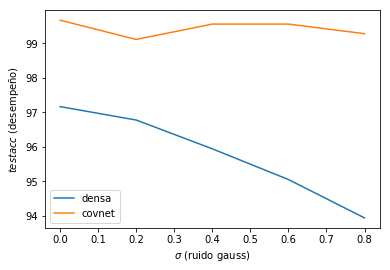

In [138]:
comparison()

Como podemos observar de la grafica, el desempeño de la red densa se ve altamente afectado por el ruido aplicado a los datos de entrenamiento. Por el otro caso, la red convolucional ni siquiera se pudo sentir el ruido aplicado a las imagenes de los datos por lo que es mas robusta. Concluimos que para el tratamiento de redes neuronales con datos de imagenes, es mejor aplicar redes convolucionales, debido a que pueden filtar este tipo de patrones con mejor eficacia que las redes densas.